# ODE Integrators I: Explicit Methods

In this lecture, we will explore numerical methods for solving ordinary differential equations (ODEs), focusing on initial value problems (IVPs).
We will begin by discussing the importance of integrating differential equations in physics and the limitations of analytical solutions.
We will then introduce the forward Euler method, which is explicit.
We will examine how truncation errors and round-off errors affect these methods.

## Introduction to Numerical ODEs

Ordinary differential equations (ODEs) are foundational to understanding and predicting the behavior of physical systems.
Many of the dynamic processes that occur in nature, from the motion of planets under gravitational forces to the oscillations of atoms in a crystal lattice, are described by differential equations.
For instance, Newton's second law, which states that the force on an object is equal to its mass times its acceleration, can be written as:
\begin{align}
F = m a = m \frac{d^2x}{dt^2}
\end{align}
This equation, along with others describing physical laws, typically involves derivatives of a function, representing rates of change, which relate the state of a system at one moment to its state at another.
In cases where physical fields, like the electromagnetic or gravitational fields, are described, partial differential equations (PDEs) are used since they involve rates of change with respect to multiple variables.
However, in this lecture, we focus on ODEs where functions depend on a single variable, typically time.

It is not always possible to solve ODEs analytically
Analytic solutions are often limited to simple or highly idealized cases.
Real-world systems tend to involve complex, nonlinear relationships that cannot be resolved through straightforward integration or algebraic manipulation.
For these cases, numerical methods provide a powerful alternative.

### Problem Definition and Types of Differential Equations

Consider the following two types of differential equations, which differ in their dependence on variables:

1.  The first type has the form:
    \begin{align}
    \frac{dx}{dt} = f(t)
    \end{align}
    Here, the right-hand side (RHS) of the equation, $f(t)$, depends only on the independent variable $t$ and not on $x$, the dependent variable we are solving for.
2.	The second type is given by:
    \begin{align}
    \frac{dx}{dt} = f(x, t)
    \end{align}
    In this equation, the RHS depends on both $t$ and $x$, making it more complicated since $x$, the quantity we are trying to determine, appears in the expression that defines its rate of change.

The first type of differential equation, where $f(t)$ depends only on $t$, can be solved by direct integration.
This is because we can integrate $f(t)$ with respect to $t$ to find $x(t)$:
\begin{align}
x(t) = x(t_0) + \int_{t_0}^t f(t') \, dt'
\end{align}
This approach is feasible when $f(t)$ is a function that can be integrated analytically.
In cases where this is not possible, numerical integration techniques, such as the trapezoidal rule or Simpson's rule, can be used to approximate the solution.
We covered these numerical integration techniques in an earlier lecture on "[Numerical Integration of Functions](../08/notes.md)".

The second type of differential equation, where $f(x, t)$ depends on both $x$ and $t$, is more complicated.
We cannot solve this type by direct integration because $x$, the function we are trying to find, is also part of the expression on the RHS. For example, attempting to directly integrate is not feasible since $x$ is unknown within the integral itself.
In other words, we do not know $x$ at intermediate points between $t_0$ and $t$, so we cannot compute the integral without first determining $x(t)$ at these points.

This is where numerical methods for ODEs become essential.
Instead of solving for $x(t)$ in one go, we use numerical methods to approximate the solution by advancing in small increments over the interval of interest.
This way, we iteratively approximate $x(t)$ at discrete points in time, allowing us to handle equations where direct integration is not possible.

Since many real-world systems fall into the second category of differential equations, where the dependence on  $x$ and $t$ is nonlinear, numerical methods are widely used in scientific computing.
These methods break down the problem into manageable steps and enable us to approximate solutions even when analytic solutions do not exist or are difficult to obtain.
Numerical methods not only provide practical solutions to ODEs but also allow for flexibility in modeling a wide range of phenomena, such as chaotic systems, non-linear oscillations, and biological systems with interacting populations.

## Euler's Method

Euler's method is the simplest techniques for numerically solving ordinary differential equations.
This method provides an easy way to approximate the solution of an initial value problem (IVP) by advancing one small step at a time.
We can apply Euler's method to an ODE of the form:
\begin{align}
\frac{dx}{dt} = f(x, t), \quad x(t_0) = x_0
\end{align}
where $x_0$ is the initial value of $x$ at time $t = t_0$.
However, as we will see below, it is usually not recommanded in pratical calculations because of its stability properties.

### Forward (Explicit) Euler Method

There are three simple ways to derive Euler's method.

The easiest way is simply hold $x$ fixed in $f(x, t)$ and apply the left Reimann sum.
The left Reimann sum is first order in step size by approximating $f(x, t)$ as a constant.
In this sense, holding $x$ is somewhat "self-consistent" in terms of approximation order.

Second, we recall the definition of a deriviative:
\begin{align}
  f(x, t) = \frac{dx}{dt} = \lim_{\Delta t\rightarrow 0}\frac{x(t + \Delta t) - x(t)}{\Delta t}.
\end{align}
If we simply remove the limit and keep the "finite difference" part, then it is trivial to show
\begin{align}
  x(t + \Delta t) &\approx x(t) + f(x(t), t)\Delta t.
\end{align}
Which is nothing but again the forward Euler method.
While very intuitive, the above two derivations do not formally show the order of the Euler method.

We may also consider a numerical approximation to the solution of an ODE.
We approximate the solution at time $t_{n+1} = t_n + \Delta t$ by using the Taylor expansion:
\begin{align}
x(t_{n+1}) = x(t_n) + f(x(t_n), t_n) \Delta t + \mathcal{O}(\Delta t^2)
\end{align}
Neglecting the higher-order terms in the expansion, we obtain once again the Forward Euler Method:
\begin{align}
x_{n+1} = x_n + f(x_n, t_n) \Delta t
\end{align}
It is thus a step-by-step approach that proceeds by evaluating $f(x, t)$ at each time point and then advancing to the next point.
It is an explicit method in 1st order.

### Example

Let's consider solving the simpmle differential equation:
\begin{align}
\frac{dx}{dt} = \lambda x(t)
\end{align}

This equation has solution
\begin{align}
x(t) = \exp[\lambda(t-t_0)]
\end{align}

If we choose $\lambda = 1$ and $x(0) = 1$, the solutoin reduces to $x(t) = \exp(t)$.

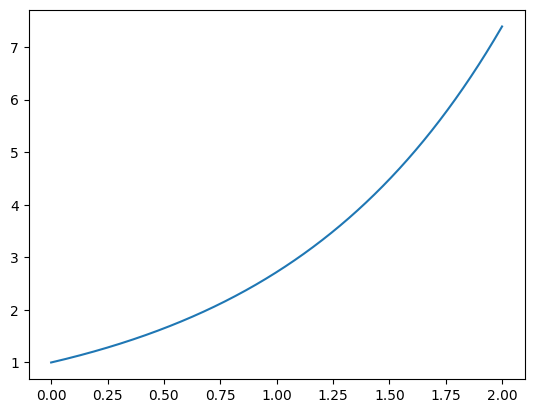

In [1]:
# Let's visualize the solution:

import numpy as np
from matplotlib import pyplot as plt

Tp = np.linspace(0, 2, 2001)
Xp = np.exp(Tp)

plt.plot(Tp, Xp)

In [2]:
# Let's implement Euler's method, with history

def forwardEuler(f, x, t, dt, n):
    T = [t]
    X = [x]
    for i in range(n):
        t += dt
        x += f(x) * dt
        T.append(t)
        X.append(x)
    return T, X

Text(0, 0.5, 'x')

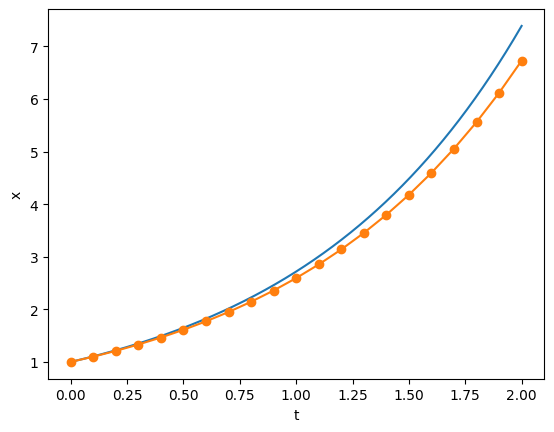

In [3]:
# Let's test Euler's method

def f(x):
    return x

T, X = forwardEuler(f, 1, 0, 0.1, 20)

plt.plot(Tp, Xp)
plt.plot(T,  X, 'o-')
plt.xlabel('t')
plt.ylabel('x')

Text(0, 0.5, 'x')

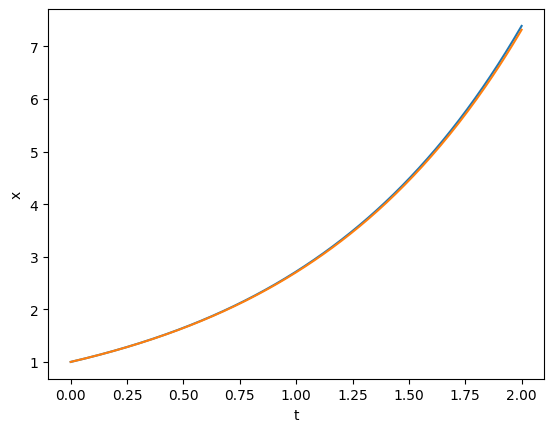

In [4]:
# The accuracy should increase when we use a small step

T, X = forwardEuler(f, 1, 0, 0.01, 200)

plt.plot(Tp, Xp)
plt.plot(T,  X)
plt.xlabel('t')
plt.ylabel('x')

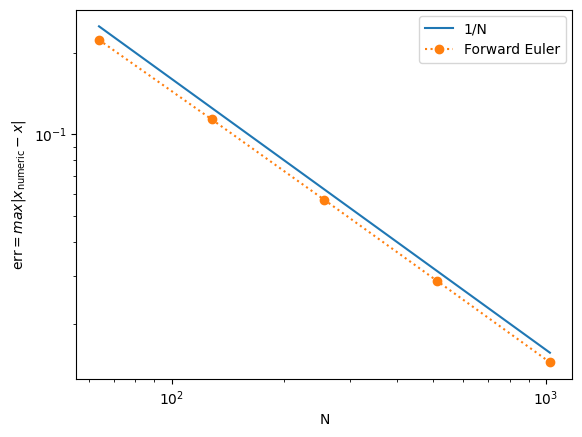

In [5]:
# As always, we can study the convergence of the numerical method

def error(N=200):
    T, X = forwardEuler(f, 1, 0, 2/N, N)
    Xp = np.exp(T)
    return np.max(abs(X - Xp))

N = np.array([64, 128, 256, 512, 1024])
E = np.array([error(n) for n in N])

plt.loglog(N, 16/N, label='1/N')
plt.loglog(N, E, 'o:', label='Forward Euler')
plt.xlabel('N')
plt.ylabel(r'$\text{err} = max|x_\text{numeric} - x|$')
plt.legend()

### System of ODEs

In computational astrophysics, we often encounter systems governed by Newton's laws:
\begin{align}
m \frac{d^2 x}{dt^2} = f(x, t)
\end{align}

This equation is a second-order ordinary differential equation because it involves the second derivative of $x$ with respect to $t$.
However, it is often more practical to convert second-order ODEs into a system of first-order ODEs.
To do this, we introduce a new variable, $v = dx/dt$, representing the velocity of the object.
This substitution allows us to rewrite the second-order ODE as two coupled first-order equations:
\begin{align} 
\frac{dx}{dt} &= v\\
\frac{dv}{dt} &= \frac{1}{m}f(x, t)
\end{align}

This formulation provides a convenient framework for numerical methods, which are generally well-suited to solving systems of first-order ODEs.
To further simplify, we can express these equations in vector notation by defining $Y = [x, v]^t$ and $F = [v, f/m]^t$. The system then becomes:
\begin{align}
\frac{dY}{dt} = F(Y, t).
\end{align}

This vector form emphasizes the structure of the system and enables us to apply general numerical techniques to solve both equations simultaneously.

To illustrate this approach, let's consider a classic example: the simple pendulum under gravity.
The motion of a pendulum of length $l$, swinging under gravity $g$, can be described by the second-order equation:
\begin{align}
\frac{d^2\theta}{dt^2} + \frac{g}{l} \sin\theta = 0
\end{align}

Here, $\theta(t)$ is the angle of the pendulum with the vertical, and the term $\sin \theta$ introduces nonlinearity, which makes the equation challenging to solve analytically.
Converting this equation into a system of first-order ODEs allows us to handle it more effectively with numerical methods.
We define $\Omega = \frac{d\theta}{dt}$, the angular velocity, leading to the following system:
\begin{align}
\frac{d\theta(t)}{dt} &= \Omega(t)\\
\frac{d\Omega(t)}{dt} &= - \frac{g}{l}\sin\theta(t)
\end{align}

In vector notation, we represent the system as:
\begin{align}
\frac{dY(t)}{dt} = F(Y, t)
\end{align}
where 
\begin{align}
Y &= \begin{bmatrix} \theta(t) \\ \Omega(t) \end{bmatrix}\\
F(Y, t) &= \begin{bmatrix} \Omega(t) \\ -\frac{g}{l} \sin \theta(t) \end{bmatrix}
\end{align}

In later part of the lecture, we will try to solve this problem.
But to derive and compare different numerical methods, let's first reduce the problem to something that has analytical solutions.
Specifically, we can simplify the pendulum problem further by assuming small oscillations, where the angle $\theta$ is small enough that $\sin \theta \approx \theta$.
This approximation linearizes the equation of motion, reducing the system to a simple harmonic oscillator.
In this approximation, the equation of motion becomes:
\begin{align}
\frac{d^2 \theta}{dt^2} + \frac{g}{l} \theta = 0
\end{align}
As a result, the system of ODEs becomes:
\begin{align}
Y &= \begin{bmatrix} \theta(t) \\ \Omega(t) \end{bmatrix}\\
F(Y, t) &= \begin{bmatrix} \Omega(t) \\ -\frac{g}{l} \theta(t) \end{bmatrix}
\end{align}

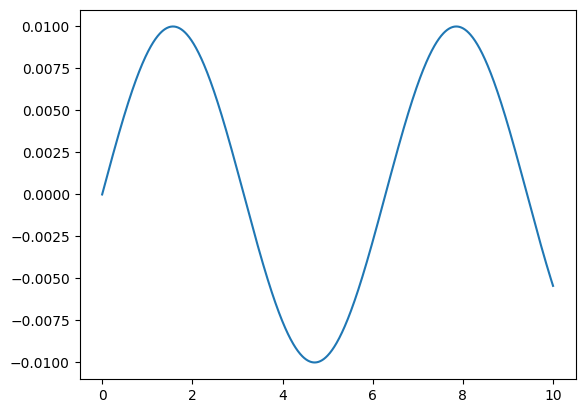

In [6]:
# Let's first plot the analytical solution

Tp     = np.linspace(0, 10, 1001)
Thetap = 0.01 * np.sin(Tp)

plt.plot(Tp, Thetap)

In [7]:
# Thanks to operator overriding,
# our forward Euler method is almost ready to solve system of ODEs

def forwardEuler(f, x, t, dt, n):
    T = np.array(t)
    X = np.array(x)
    for i in range(n):
        t += dt
        x += np.array(f(*x)) * dt # *x says unpack tuple
        T = np.append( T, t )
        X = np.vstack((X, x))
    return T, X

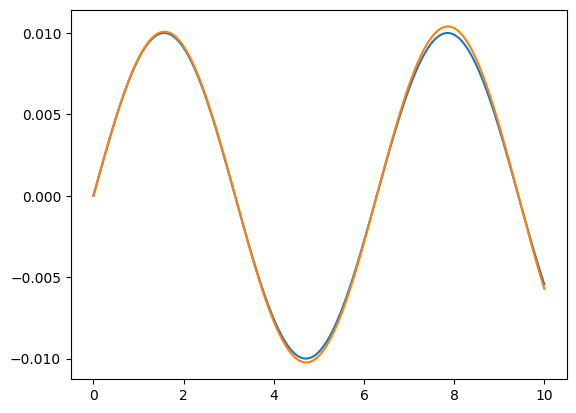

In [8]:
# Compare the analytical and numerical solutions

def f(theta, omega):
    return omega, -theta

T, X = forwardEuler(f, (0, 0.01), 0, 0.01, 1000)

Theta = X[:,0]
Omega = X[:,1]

plt.plot(Tp, Thetap)
plt.plot(T,  Theta)

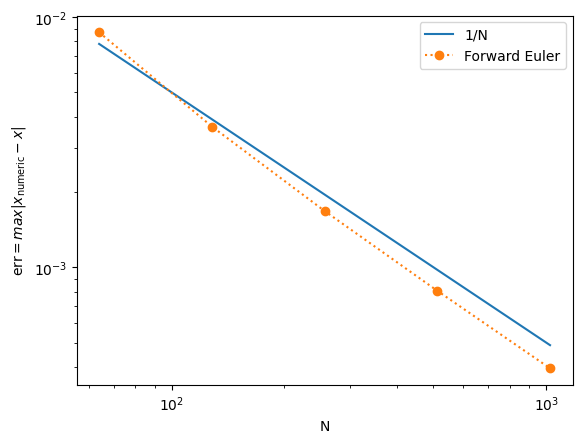

In [9]:
# Again, we can study the convergence of the numerical method

def error(N=100):
    T, X = forwardEuler(f, (0, 0.01), 0, 10/N, N)
    Theta  = X[:,0]
    Thetap = 0.01 * np.sin(T)
    return np.max(abs(Theta - Thetap))

N = np.array([64, 128, 256, 512, 1024])
E = np.array([error(n) for n in N])

plt.loglog(N, 0.5/N, label='1/N')
plt.loglog(N, E, 'o:', label='Forward Euler')
plt.xlabel('N')
plt.ylabel(r'$\text{err} = max|x_\text{numeric} - x|$')
plt.legend()

### Can We Improve the Method?

The Forward Euler method is only first-order accurate, meaning its error decreases linearly with the step size $\Delta t$.
While it is simple to implement, this method's convergence rate is limited, and achieving higher accuracy requires very small steps, which can become computationally expensive.
This naturally raises the question: can we improve the convergence rate of our numerical solution, reducing the error more rapidly as we use smaller steps?
To explore this, we can draw inspiration from our previous work on numerical integration.
In that context, we observed that the midpoint (or central) Riemann sum converges faster than the left or right Riemann sums.
This suggests that a midpoint approach may also provide advantages in solving ODEs.

### A Midpoint Method

One possible improvement is to propose a midpoint method that attempts to evaluate the function $f$ at the midpoint between steps.
Mathematically, this approach can be expressed as:
\begin{align}
X_{n+1} = X_n + f(X_{n+1/2}, t_{n+1/2}) \Delta t
\end{align}
However, a significant obstacle arises: the midpoint value $f_{n+1/2} \equiv f(X_{n+1/2}, t_{n+1/2})$ is unknown at step $n$.
We need to know the value of $X$ at the midpoint $t_{n+1/2}$ to use this method, but this value cannot be calculated without already knowing the future values of $X$.
This issue makes a straightforward midpoint method impractical for generic ODEs, where $f$ depends on both $X$ and $t$.

An exception occurs if $f$ depends only on $t$, as in $\frac{dx}{dt} = f(t)$;
in such cases, a true midpoint method is feasible, which is nothing but out middle Reimann sum.
However, for most ODEs, including those where $f$ depends on $X$, a different approach is necessary.

### A Simple Idea: The Second-Order Runge-Kutta Method

To work around this issue, we can approximate the midpoint value instead of calculating it exactly.
It suffices to find an approximate solution for $X$ at the half-step, which we denote as $Y_{n+1/2}$.
One way to do this is to use the Forward Euler method to compute an estimated value at the midpoint.
Specifically, we can approximate $X$ at $t_{n+1/2}$ as:
\begin{align}
\tilde{X}_{n+1/2} = X_n + f(X_n, t_n) \frac{\Delta t}{2}
\end{align}
Using this half-step approximation, we then proceed with a full step to find $X_{n+1}$ by evaluating $f$ at the midpoint:
\begin{align}
X_{n+1} = X_n + f(\tilde{X}_{n+1/2}, t_{n+1/2}) \Delta t
\end{align}
This approach, known as the second-order Runge-Kutta method, provides a way to incorporate midpoint information, achieving second-order accuracy.
The second-order Runge-Kutta method improves convergence by leveraging an approximate midpoint, resulting in a more accurate solution than the first-order Euler method without requiring a prohibitively small step size.

In [10]:
def Euler2(f, x, t, dt, n):
    T = np.array(t)
    X = np.array(x)
    
    for i in range(n):
        k1 = dt * np.array(f(*(x )))
        xh = x + 0.5*k1
        k2 = dt * np.array(f(*(xh)))
        t += dt
        x  = xh + 0.5*k2
        
        T = np.append( T, t)
        X = np.vstack((X, x))
        
    return T, X

In [11]:
def RK2(f, x, t, dt, n):
    T = np.array(t)
    X = np.array(x)
    
    for i in range(n):
        k1 = dt * np.array(f(*(x         )))
        k2 = dt * np.array(f(*(x + 0.5*k1)))
        
        t += dt
        x += k2
        
        T = np.append( T, t)
        X = np.vstack((X, x))
        
    return T, X

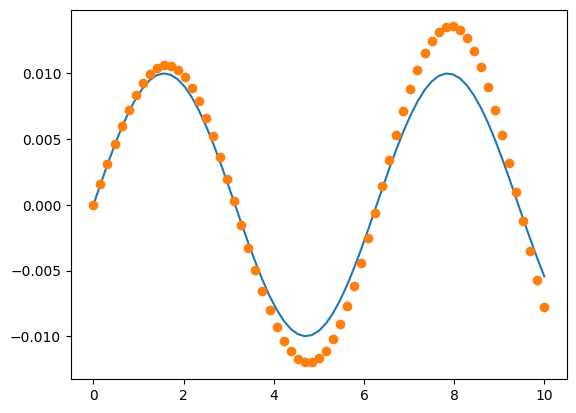

In [12]:
N=64

T, X = Euler2(f, (0, 0.01), 0, 10/N, N)

plt.plot(T, 0.01*np.sin(T))
plt.plot(T, X[:,0], 'o')

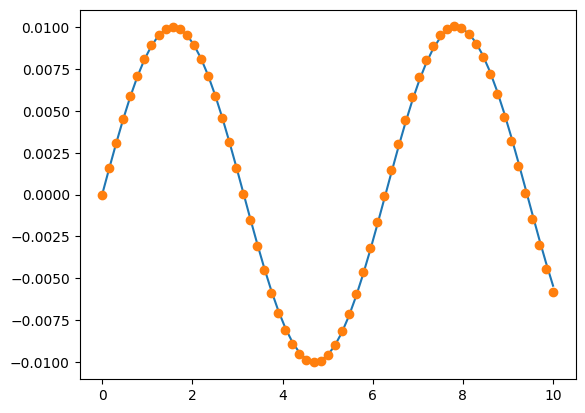

In [13]:
N=64

T, X = RK2(f, (0, 0.01), 0, 10/N, N)

plt.plot(T, 0.01*np.sin(T))
plt.plot(T, X[:,0], 'o')

In [14]:
def errorEuler2(N=100):
    T, X = Euler2(f, (0, 0.01), 0, 10/N, N)
    Theta  = X[:,0]
    Thetap = 0.01 * np.sin(T)
    return np.max(abs(Theta - Thetap))

1.5075036412166062e-06


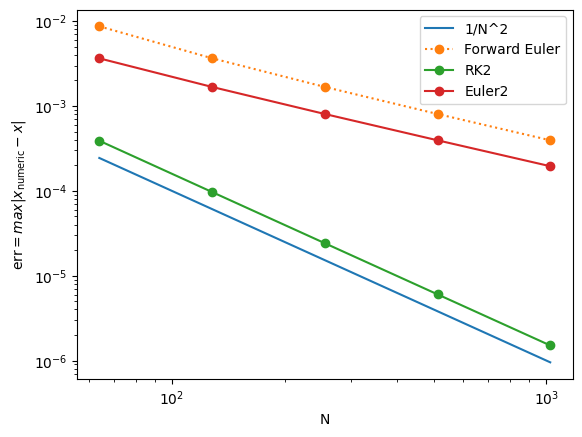

In [15]:
def error2(N=100):
    T, X = RK2(f, (0, 0.01), 0, 10/N, N)
    Theta  = X[:,0]
    Thetap = 0.01 * np.sin(T)
    return np.max(abs(Theta - Thetap))

N = np.array([64, 128, 256, 512, 1024])
E2 = np.array([error2(n) for n in N])
E22 = np.array([errorEuler2(n) for n in N])

print(E2[-1])

plt.loglog(N, 1/N**2,  label='1/N^2')
plt.loglog(N, E, 'o:', label='Forward Euler')
plt.loglog(N, E2,'o-', label='RK2')
plt.loglog(N, E22,'o-', label='Euler2')
plt.xlabel('N')
plt.ylabel(r'$\text{err} = max|x_\text{numeric} - x|$')
plt.legend()

The convergence plot clearly demonstrates that RK2 achieves second-order accuracy.
This means that the error decreases quadratically with the step size $\Delta t$.
For example, using 1024 points for the integration not only doubles the computational cost compared to using 512 points but also improves the accuracy of the solution by approximately 250 times.
This significant increase in accuracy suggests that higher-order methods offer substantial benefits, especially for problems requiring high precision.
Naturally, this brings us to the question: can we improve the accuracy even further than what RK2 provides?

### Observation and Proposal

In the second-order Runge-Kutta method (RK2), the midpoint value $X_n + \frac{1}{2}k_1$ is obtained using a simple approximation derived from the Forward Euler method.
Specifically, we first calculate $k_1$ as:
\begin{align}
k_1 = \Delta t \, f(X_n, t_n)
\end{align}
and then use this to approximate $k_2$:
\begin{align}
k_2 = \Delta t \, f\left(X_n + \frac{1}{2}k_1, t_n + \frac{1}{2} \Delta t\right)
\end{align}
This approach provides a basic estimate for the midpoint.
However, we can improve this estimate by refining our approximation of the midpoint using another application of the Forward Euler estimate.
We calculate $k_3$ as follows:
\begin{align}
k_3 = \Delta t \, f\left(X_n + \frac{1}{2}k_2, t_n + \frac{1}{2} \Delta t\right)
\end{align}
Finally, to complete the full step with this improved midpoint estimate, we compute $k_4$:
\begin{align}
k_4 = \Delta t \, f(X_n + k_3, t_n + \Delta t)
\end{align}

The values $k_1$, $k_2$, $k_3$, and $k_4$ each provide estimates of how $X$ will change over one step, though they carry different error terms.
By combining these terms carefully, we can construct a higher-order method that effectively cancels out some of the error components.
This technique, when implemented correctly, yields an even more accurate approximation than any single $k$-estimate alone, allowing us to achieve the accuracy of a fourth-order Runge-Kutta method (RK4).

### Fourth-Order Runge-Kutta Method

The classical fourth-order Runge-Kutta method (RK4) is a widely used technique for numerically solving ordinary differential equations with high accuracy.
This method calculates four intermediate values at each time step, combining them to achieve fourth-order accuracy.
The process begins by computing four slopes, $k_1$, $k_2$, $k_3$, and $k_4$, which represent different estimates of the derivative over the interval:
\begin{align}
k_1 &= \Delta t \, f(X_n, t_n) \\
k_2 &= \Delta t \, f\left(X_n + \frac{1}{2}k_1, t_n + \frac{1}{2}\Delta t\right) \\
k_3 &= \Delta t \, f\left(X_n + \frac{1}{2}k_2, t_n + \frac{1}{2}\Delta t\right) \\
k_4 &= \Delta t \, f\left(X_n + k_3, t_n + \Delta t\right)
\end{align}
Once these intermediate values are calculated, they are combined to update $X$ at the next step.

The weighted average of these values, with coefficients that cancel higher-order error terms, is assumed to have the generic form
\begin{align}
X_{n+1} = X_n + a_1 k_1 + a_2 k_2 + a_3 k_3 + a_4 k_4 + \mathcal{O}(\Delta t^5).
\end{align}

But what should be the values of $a_i$?
The derivation turns out to be tedious but straightforwards.

Recalling we want to solve an ODE:
\begin{align}
\frac{dx}{dt} = f(x)
\end{align}
The solution $x(t)$ evaluated at $t_{n+1} = (n+1) \Delta t$ can be written in terms of $x(t)$ evaluated at $t_n$ in Taylor series.
I.e.,
\begin{align}
x_{n+1} = x_n + x'_n \Delta t + \frac{1}{2}x''_n \Delta t + \frac{1}{3!} x'''_n \Delta t^3 + \frac{1}{4!} x''''_n \Delta t^4 + \cdots
\end{align}
Here, we use $x_n \equiv x(t_n) \equiv x(n \Delta t)$.
Substituting the ODE into the Taylor series, we obtain
\begin{align}
x_{n+1} = x_n + f_n \Delta t + \frac{1}{2}f'_n \Delta t + \frac{1}{3!} f''_n \Delta t^3 + \frac{1}{4!} f'''_n \Delta t^4 + \cdots
\end{align}

To construct Runge-Kutta method, we consider a formulation
\begin{align}
x_{n+1} = x_n + a_1 \Delta_1 x_n + a_2 \Delta_2 x_n + \cdots + a_s \Delta_s x_n
\end{align}
for some $s$, where
\begin{align}
\Delta_1 x_n &\equiv f(x(t_n)) \Delta t \\
\Delta_2 x_n &\equiv f(x(t_n + b_2 \Delta t)) \Delta t = (f_n + f'_n b_2 \Delta t + \frac{1}{2} f''_n b_2^2 \Delta t^2 + \cdots)\Delta t\\
\cdots \\
\Delta_s x_n &\equiv f(x(t_n + b_s \Delta t)) \Delta t = (f_n + f'_n b_s \Delta t + \frac{1}{2} f''_n b_s^2 \Delta t^2 + \cdots)\Delta t
\end{align}

Substitute, we obtain
\begin{align}
x_{n+1} = x_n
&+ a_1 f_n \Delta t \\
&+ a_2 (f_n \Delta t + f'_n b_2 \Delta t^2 + \frac{1}{2} f''_n b_2^2 \Delta t^3 + \cdots) \\
&+ \cdots \\
&+ a_s (f_n \Delta t + f'_n b_s \Delta t^2 + \frac{1}{2} f''_n b_s^2 \Delta t^3 + \cdots)
\end{align}

For 4th-order scheme, collecting the terms and require all terms up to $\Delta t^4$ match, we obtain the conditions
\begin{align}
a_1       + a_2       + a_3       + a_4       &=       1     \\
            a_2 b_2   + a_3 b_3   + a_4 b_4   &= \frac{1}{2} \\
            a_2 b_2^2 + a_3 b_3^2 + a_4 b_4^2 &= \frac{1}{3} \\
            a_2 b_2^3 + a_3 b_3^3 + a_4 b_4^3 &= \frac{1}{4}
\end{align}

For the classical 4th-order Runge-Kutta scheme, we have already decided $b_1 = 0$, $b_2 = b_3 = 1/2$, and $b_4 = 1$.
Therefore, the system of coefficients read:
\begin{align}
a_1       + a_2       + a_3       + a_4 &=       1     \\
\frac{1}{2} a_2 + \frac{1}{2} a_3 + a_4 &= \frac{1}{2} \\
\frac{1}{4} a_2 + \frac{1}{4} a_3 + a_4 &= \frac{1}{3} \\
\frac{1}{8} a_2 + \frac{1}{8} a_3 + a_4 &= \frac{1}{4}
\end{align}
It is then easy to verify that
\begin{align}
(a_1, a_2, a_3, a_4) = \left(\frac{1}{6},\frac{1}{3},\frac{1}{3},\frac{1}{6}\right)
\end{align}
is the solution.

In [16]:
def RK4(f, x, t, dt, n):
    T = np.array(t)
    X = np.array(x)
    
    for i in range(n):
        k1 = dt * np.array(f(*(x         )))
        k2 = dt * np.array(f(*(x + 0.5*k1)))
        k3 = dt * np.array(f(*(x + 0.5*k2)))
        k4 = dt * np.array(f(*(x +     k3)))
        
        t += dt
        x += k1/6 + k2/3 + k3/3 + k4/6
        
        T = np.append( T, t)
        X = np.vstack((X, x))
        
    return T, X

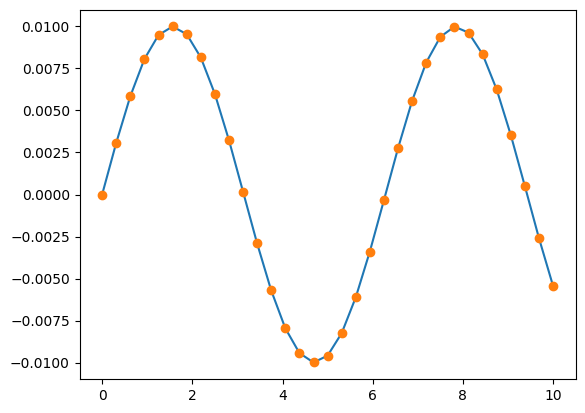

In [21]:
N=32

T, X = RK4(f, (0, 0.01), 0, 10/N, N)

plt.plot(T, 0.01*np.sin(T))
plt.plot(T, X[:,0], 'o')

7.189048401717857e-12


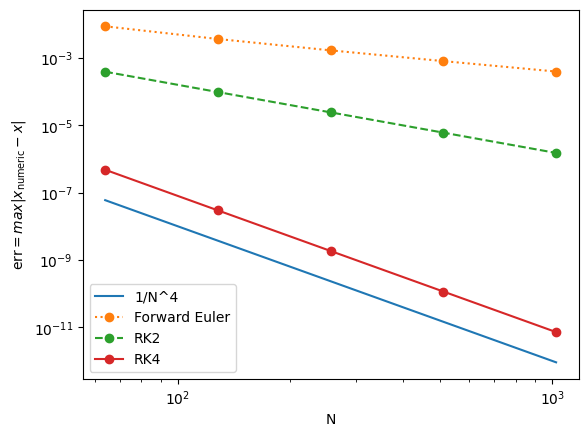

In [18]:
def error3(N=100):
    T, X = RK4(f, (0, 0.01), 0, 10/N, N)
    Theta  = X[:,0]
    Thetap = 0.01 * np.sin(T)
    return np.max(abs(Theta - Thetap))

N = np.array([64, 128, 256, 512, 1024])
E3 = np.array([error3(n) for n in N])

print(E3[-1])

plt.loglog(N, 1/N**4,   label='1/N^4')
plt.loglog(N, E, 'o:',  label='Forward Euler')
plt.loglog(N, E2,'o--', label='RK2')
plt.loglog(N, E3,'o-',  label='RK4')
plt.xlabel('N')
plt.ylabel(r'$\text{err} = max|x_\text{numeric} - x|$')
plt.legend()

Note that, if one choose $b_1 = 0$, $b_2 = 1/3$, $b_3 = 2/3$, and $b_4 = 1$, then the solutoin is
\begin{align}
(a_1, a_2, a_3, a_4) = \left(\frac{1}{8},\frac{3}{8},\frac{3}{8},\frac{1}{8}\right).
\end{align}
This is Wilhelm Kutta (1901)'s "3/8 method".

This suggests that Runge-Kutta methods are really a "family", where many different choices can be used to construct numerical schemes with the same order.
The perform of the numerical scheme, nevertheless, depends on the number of oeprations as well as the properties of the ODEs being solved.

## Complete gravity pendulum problem

With a highly accurate ODE integrator like RK4, we are now equipped to solve the complete gravity pendulum problem without needing to make simplifying assumptions.

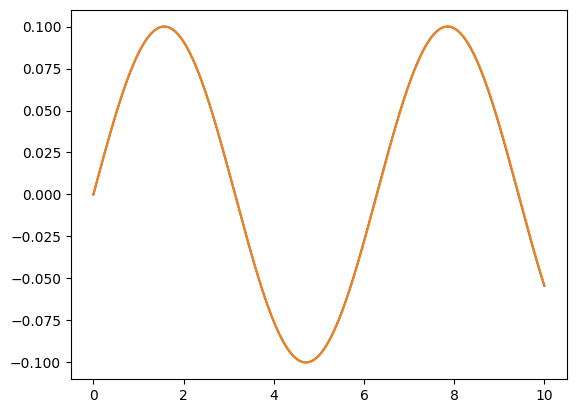

In [22]:
# With a high accurate ODE integrator, we can solve for the full gravity pendulum problem:

def f(theta, omega):
    return omega, -np.sin(theta)

N  = 1000
v0 = 0.1
T, X = RK4(f, (0, v0), 0, 10/N, N)

Theta = X[:,0]
Omega = X[:,1]

plt.plot(T, v0 * np.sin(T))
plt.plot(T, Theta)

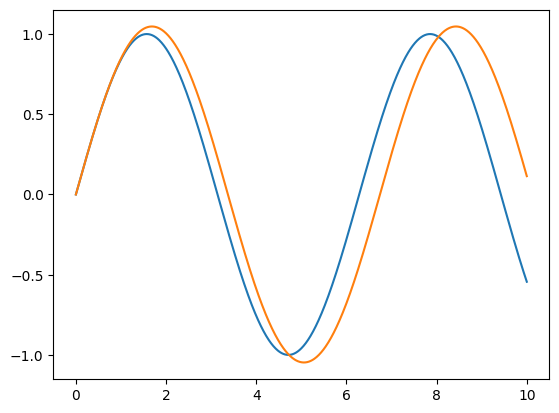

In [23]:
# When the initial velocity is no longer small, the simple harmonic oscillator approximation is no longer valid.

N  = 1000
v0 = 1
T, X = RK4(f, (0, v0), 0, 10/N, N)

Theta = X[:,0]
Omega = X[:,1]

plt.plot(T, v0 * np.sin(T))
plt.plot(T, Theta)

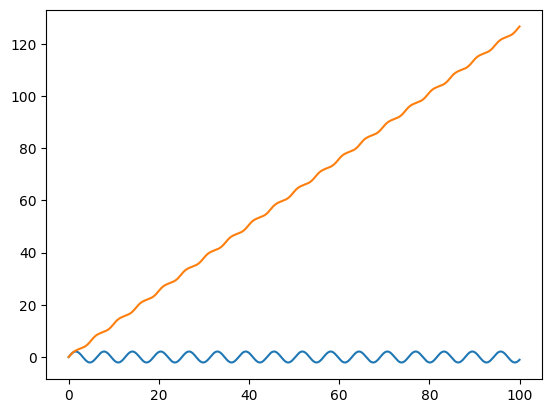

In [24]:
# When the initial velocity is large enough, the solution is not periodic.  What's going on?

N  = 1000
v0 = 2.1
T, X = RK4(f, (0, v0), 0, 10/N,  10 * N)

Theta = X[:,0]
Omega = X[:,1]

plt.plot(T, v0 * np.sin(T))
plt.plot(T, Theta)

## Final Comments

Using the insights we developed while exploring numerical integrators, we introduced the fourth-order Runge-Kutta (RK4) method as a powerful and effective approach for solving ordinary differential equations.
The classical RK4 method is not only highly accurate but also robust and relatively simple to implement, making it a reliable "workhorse" for ODE integration across many applications.

When paired with advanced techniques such as adaptive time-stepping and dense output, RK4 becomes even more versatile, extending its applications to a wide range of complex problems.
However, while RK4 is broadly effective, it's important to remember that there are many other ODE integrators available, each with strengths suited to specific types of equations.
For certain problems—especially those involving stiffness or requiring highly efficient, precise computations—other methods may offer better performance.

For further study and a deeper dive into alternative methods, consult resources like [Numerical Recipes](http://s3.amazonaws.com/nrbook.com/book_C210.html) for additional options and implementation guidance.